## 01. Import Libraries

In [2]:
# import libraries:

import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

## 02. Import Data

In [63]:
# importing our most recent data set:

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4780/831939132.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)


In [67]:
df.head()

ride_id  rideable_type               started_at  \
0  3369D016821ACD0A   classic_bike  2022-01-01 09:55:25.013   
1  0617BD2A38E149CF  electric_bike  2022-01-01 15:10:00.630   
2  040D9CEB9A11C469  electric_bike  2022-01-01 02:35:34.345   
3  7E01F3FA7BAC8F02   classic_bike  2022-01-01 15:29:24.789   
4  5FBAD09F5F32B2E4  electric_bike  2022-01-01 08:38:24.623   

                  ended_at                  start_station_name  \
0  2022-01-01 10:05:47.093               Lafayette St & E 8 St   
1  2022-01-01 15:18:29.885  Frederick Douglass Blvd & W 117 St   
2  2022-01-01 02:58:21.676                     W 42 St & 6 Ave   
3  2022-01-01 15:40:11.693                     1 Ave & E 16 St   
4  2022-01-01 08:48:09.812                    W 59 St & 10 Ave   

  start_station_id        end_station_name end_station_id  start_lat  \
0          5788.13         8 Ave & W 16 St        6072.11  40.730207   
1          7688.12     Park Ave & E 124 St        7682.01  40.805159   
2          6517.08     W 100 St & Broadway        7580.01  40.754920   
3          5779.08     Hudson St & W 13 St        6115.06  40.732219   
4          7023.04  West End Ave & W 94 St        7524.09  40.770513   

   start_lng    end_lat    end_lng member_casual        date  average_temp  \
0 -73.991026  40.740983 -74.001702        casual  2022-01-01          11.6   
1 -73.954692  40.804555 -73.939686        casual  2022-01-01          11.6   
2 -73.984550  40.797372 -73.970412        member  2022-01-01          11.6   
3 -73.981656  40.740057 -74.005274        member  2022-01-01          11.6   
4 -73.988038  40.794165 -73.974124        member  2022-01-01          11.6   

   trip_length_minutes  daily_ride_count  
0            10.368000              5105  
1             8.487583              5105  
2            22.788850              5105  
3            10.781733              5105  
4             9.753150              5105

In [69]:
df['trip_length_minutes'].value_counts()

trip_length_minutes
4.664800     22
5.247417     22
3.759783     22
5.628167     22
5.269300     22
             ..
38.210117     1
50.982900     1
18.023250     1
33.203867     1
34.156983     1
Name: count, Length: 2152864, dtype: int64

In [71]:
df.shape

(7441508, 17)

In [73]:
df['trip_length_minutes'].describe()

count    7.441508e+06
mean     1.533014e+01
std      3.199039e+01
min      1.000267e+00
25%      5.785517e+00
50%      1.013198e+01
75%      1.790932e+01
max      1.439905e+03
Name: trip_length_minutes, dtype: float64

## 03. Analysis

In [76]:
# creating a new dataframe to see which ride paths are the most popular.
# first step is to create the new dataframe, then group by starting and ending stations
# finally, creating a new count column with a value of one to allow us to begin the count :)

df['path_count'] = 1
df_rides = df.groupby(['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])['path_count'].count().reset_index()

df_rides.head(50)

start_station_name   end_station_name  start_lat  start_lng    end_lat  \
0    1 Ave & E 110 St   1 Ave & E 110 St  40.792144 -73.937845  40.792327   
1    1 Ave & E 110 St   1 Ave & E 110 St  40.792240 -73.938077  40.792327   
2    1 Ave & E 110 St   1 Ave & E 110 St  40.792287 -73.938110  40.792327   
3    1 Ave & E 110 St   1 Ave & E 110 St  40.792308 -73.938257  40.792327   
4    1 Ave & E 110 St   1 Ave & E 110 St  40.792312 -73.938178  40.792327   
5    1 Ave & E 110 St   1 Ave & E 110 St  40.792312 -73.938245  40.792327   
6    1 Ave & E 110 St   1 Ave & E 110 St  40.792327 -73.938300  40.792327   
7    1 Ave & E 110 St   1 Ave & E 110 St  40.792327 -73.938300  40.792327   
8    1 Ave & E 110 St   1 Ave & E 110 St  40.792328 -73.938110  40.792327   
9    1 Ave & E 110 St   1 Ave & E 110 St  40.792337 -73.938170  40.792327   
10   1 Ave & E 110 St   1 Ave & E 110 St  40.792340 -73.938266  40.792327   
11   1 Ave & E 110 St   1 Ave & E 110 St  40.792342 -73.938282  40.792327   
12   1 Ave & E 110 St   1 Ave & E 110 St  40.792344 -73.938149  40.792327   
13   1 Ave & E 110 St   1 Ave & E 110 St  40.792345 -73.938291  40.792327   
14   1 Ave & E 110 St   1 Ave & E 110 St  40.792345 -73.938032  40.792327   
15   1 Ave & E 110 St   1 Ave & E 110 St  40.792367 -73.938178  40.792327   
16   1 Ave & E 110 St   1 Ave & E 110 St  40.792373 -73.938174  40.792327   
17   1 Ave & E 110 St   1 Ave & E 110 St  40.792383 -73.938155  40.792327   
18   1 Ave & E 110 St   1 Ave & E 110 St  40.792399 -73.937989  40.792327   
19   1 Ave & E 110 St   1 Ave & E 110 St  40.792414 -73.938284  40.792327   
20   1 Ave & E 110 St   1 Ave & E 110 St  40.792430 -73.938171  40.792327   
21   1 Ave & E 110 St   1 Ave & E 110 St  40.792431 -73.938251  40.792327   
22   1 Ave & E 110 St   1 Ave & E 110 St  40.792435 -73.938227  40.792327   
23   1 Ave & E 110 St   1 Ave & E 110 St  40.792438 -73.938100  40.792327   
24   1 Ave & E 110 St   1 Ave & E 110 St  40.792440 -73.938246  40.792327   
25   1 Ave & E 110 St   1 Ave & E 110 St  40.792446 -73.938146  40.792327   
26   1 Ave & E 110 St   1 Ave & E 110 St  40.792471 -73.938021  40.792327   
27   1 Ave & E 110 St   1 Ave & E 110 St  40.792480 -73.938215  40.792327   
28   1 Ave & E 110 St   1 Ave & E 110 St  40.792499 -73.938057  40.792327   
29   1 Ave & E 110 St    1 Ave & E 18 St  40.792327 -73.938300  40.733812   
30   1 Ave & E 110 St    1 Ave & E 30 St  40.792327 -73.938300  40.741444   
31   1 Ave & E 110 St    1 Ave & E 44 St  40.792327 -73.938300  40.750020   
32   1 Ave & E 110 St    1 Ave & E 44 St  40.792433 -73.938310  40.750020   
33   1 Ave & E 110 St    1 Ave & E 62 St  40.792327 -73.938300  40.761227   
34   1 Ave & E 110 St    1 Ave & E 62 St  40.792379 -73.938206  40.761227   
35   1 Ave & E 110 St    1 Ave & E 68 St  40.792327 -73.938300  40.765005   
36   1 Ave & E 110 St    1 Ave & E 78 St  40.792276 -73.937930  40.771404   
37   1 Ave & E 110 St    1 Ave & E 78 St  40.792302 -73.938162  40.771404   
38   1 Ave & E 110 St    1 Ave & E 78 St  40.792327 -73.938300  40.771404   
39   1 Ave & E 110 St    1 Ave & E 94 St  40.792327 -73.938300  40.781721   
40   1 Ave & E 110 St    1 Ave & E 94 St  40.792344 -73.938210  40.781721   
41   1 Ave & E 110 St    1 Ave & E 94 St  40.792348 -73.938058  40.781721   
42   1 Ave & E 110 St    1 Ave & E 94 St  40.792365 -73.938273  40.781721   
43   1 Ave & E 110 St    1 Ave & E 94 St  40.792419 -73.938186  40.781721   
44   1 Ave & E 110 St    1 Ave & E 94 St  40.792454 -73.938194  40.781721   
45   1 Ave & E 110 St    1 Ave & E 94 St  40.792470 -73.938159  40.781721   
46   1 Ave & E 110 St   10 Ave & W 14 St  40.792364 -73.938101  40.741982   
47   1 Ave & E 110 St  10 Ave & W 215 St  40.792327 -73.938300  40.869325   
48   1 Ave & E 110 St   10 Ave & W 28 St  40.792327 -73.938300  40.750664   
49   1 Ave & E 110 St   11 Ave & W 41 St  40.792327 -73.938300  40.760301   

      end_lng  path_count  
0  -73.938300           1  
1  -73.938300      

In [78]:
# this didn't quite give me the desired result, it appears that there are *slight* variations of each latitude and longitude.
# For consistency, I am going to keep the first instance of coordinates for each station.
# going to first take a subset of the df, then drop any duplicates
# finally going to set the index as the station name
# then going to use .map() to add it back into our df
# then going to recalculate rides/stations

first_start_coords = df.drop_duplicates(subset = 'start_station_name', keep = 'first')[['start_station_name', 'start_lat', 'start_lng']]

# Set 'start_station_name' as the index for easier mapping
first_start_coords.set_index('start_station_name', inplace=True)

# Map the first start_lat and start_lng back to the original DataFrame
df['start_lat'] = df['start_station_name'].map(first_start_coords['start_lat'])
df['start_lng'] = df['start_station_name'].map(first_start_coords['start_lng'])

In [80]:
# repeating the above with end coordinates:

# get the first instance of each end station with its coordinates
first_end_coords = df.drop_duplicates(subset='end_station_name', keep='first')[['end_station_name', 'end_lat', 'end_lng']]

# Set 'end_station_name' as the index for easier mapping
first_end_coords.set_index('end_station_name', inplace=True)

# Map the first end_lat and end_lng back to the original DataFrame
df['end_lat'] = df['end_station_name'].map(first_end_coords['end_lat'])
df['end_lng'] = df['end_station_name'].map(first_end_coords['end_lng'])

In [82]:
# creating a new dataframe to see which ride paths are the most popular.
# first step is to create the new dataframe, then group by starting and ending stations
# finally, creating a new count column with a value of one to allow us to begin the count :)

df['path_count'] = 1
df_rides = df.groupby(['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])['path_count'].count().reset_index()

df_rides.head(50)

start_station_name                              end_station_name  \
0    1 Ave & E 110 St                              1 Ave & E 110 St   
1    1 Ave & E 110 St                               1 Ave & E 18 St   
2    1 Ave & E 110 St                               1 Ave & E 30 St   
3    1 Ave & E 110 St                               1 Ave & E 44 St   
4    1 Ave & E 110 St                               1 Ave & E 62 St   
5    1 Ave & E 110 St                               1 Ave & E 68 St   
6    1 Ave & E 110 St                               1 Ave & E 78 St   
7    1 Ave & E 110 St                               1 Ave & E 94 St   
8    1 Ave & E 110 St                              10 Ave & W 14 St   
9    1 Ave & E 110 St                             10 Ave & W 215 St   
10   1 Ave & E 110 St                              10 Ave & W 28 St   
11   1 Ave & E 110 St                              11 Ave & W 41 St   
12   1 Ave & E 110 St                              11 Ave & W 59 St   
13   1 Ave & E 110 St                             12 Ave & W 125 St   
14   1 Ave & E 110 St                              12 Ave & W 40 St   
15   1 Ave & E 110 St                              2 Ave & E 104 St   
16   1 Ave & E 110 St                              2 Ave & E 122 St   
17   1 Ave & E 110 St                              2 Ave & E 125 St   
18   1 Ave & E 110 St                               2 Ave & E 29 St   
19   1 Ave & E 110 St                               2 Ave & E 31 St   
20   1 Ave & E 110 St                               2 Ave & E 55 St   
21   1 Ave & E 110 St                               2 Ave & E 72 St   
22   1 Ave & E 110 St                               2 Ave & E 96 St   
23   1 Ave & E 110 St                               2 Ave & E 99 St   
24   1 Ave & E 110 St                              3 Ave & E 100 St   
25   1 Ave & E 110 St                              3 Ave & E 112 St   
26   1 Ave & E 110 St                              3 Ave & E 163 St   
27   1 Ave & E 110 St                              3 Ave & E 170 St   
28   1 Ave & E 110 St  3 Ave & E 174 St - Bathgate Vaccination Site   
29   1 Ave & E 110 St                               3 Ave & E 62 St   
30   1 Ave & E 110 St                               3 Ave & E 72 St   
31   1 Ave & E 110 St                                31 Ave & 61 St   
32   1 Ave & E 110 St                          31 Ave & Steinway St   
33   1 Ave & E 110 St                           31 St & Newtown Ave   
34   1 Ave & E 110 St                           31 St & Thomson Ave   
35   1 Ave & E 110 St                                34 Ave & 38 St   
36   1 Ave & E 110 St                                35 St & 34 Ave   
37   1 Ave & E 110 St                                38 Ave & 29 St   
38   1 Ave & E 110 St                                 46 Ave & 5 St   
39   1 Ave & E 110 St                               5 Av & W 139 St   
40   1 Ave & E 110 St                              5 Ave & E 103 St   
41   1 Ave & E 110 St                              5 Ave & E 135 St   
42   1 Ave & E 110 St                               5 Ave & E 29 St   
43   1 Ave & E 110 St                               5 Ave & E 72 St   
44   1 Ave & E 110 St                               5 Ave & E 78 St   
45   1 Ave & E 110 St                               5 Ave & E 87 St   
46   1 Ave & E 110 St                               5 Ave & E 93 St   
47   1 Ave & E 110 St                              5 Ave & W 126 St   
48   1 Ave & E 110 St                              5 Ave & W 131 St   
49   1 Ave & E 110 St                               6 Ave & W 33 St   

    start_lat  start_lng    end_lat    end_lng  path_count  
0   40.792327   -73.9383  40.792327 -73.938300         201  
1   40.792327   -73.9383  40.733812 -73.980544           1  
2   40.792327   -73.9383  40.741444 -73.975361           2  
3   40.792327   -73.9383  40.750020 -73.969053           5  
4   40.792327   -73.9383  40.761227 -73.960940           7  
5   40.792327  

In [83]:
# this output is MUCH better!

df_rides.shape

(664516, 7)

In [13]:
# exporting this!

# exporting this for future use!

df_rides.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/most_popular_ride_paths_w_coordinates.csv')

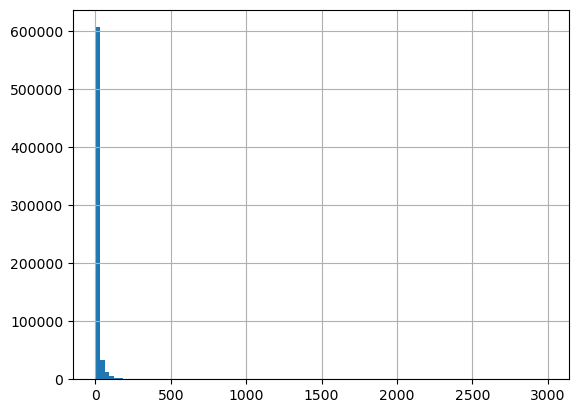

In [86]:
# quick histogram to check distribution:

df_rides['path_count'].hist(bins = 100)
plt.show()

In [88]:
# the majority of rides aren't taken very frequently, but that's okay! 
# we can check this out more when we initialize our map!

df_rides['path_count'].describe()

count    664516.000000
mean         11.198388
std          30.051404
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2991.000000
Name: path_count, dtype: float64

In [90]:
# it'll be interesting to see which path was taken most frequently! If we order the df_rides by count, we should be able to gather more info!

df_rides_sorted = df_rides.sort_values(by='path_count', ascending = False)
df_rides_sorted.head(20)

start_station_name                   end_station_name  \
187273             Central Park S & 6 Ave             Central Park S & 6 Ave   
90486          7 Ave & Central Park South         7 Ave & Central Park South   
509665           Roosevelt Island Tramway           Roosevelt Island Tramway   
521635                   Soissons Landing                   Soissons Landing   
356984  Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S   
584559                    W 21 St & 6 Ave                    9 Ave & W 22 St   
73200                     5 Ave & E 72 St                    5 Ave & E 72 St   
4731                      1 Ave & E 62 St                    1 Ave & E 68 St   
664515              Yankee Ferry Terminal              Yankee Ferry Terminal   
161790                 Broadway & W 58 St                 Broadway & W 58 St   
190434        Central Park West & W 72 St        Central Park West & W 72 St   
158511                 Broadway & W 41 St                 Broadway & W 41 St   
14917                    12 Ave & W 40 St                   12 Ave & W 40 St   
472191      North Moore St & Greenwich St               Vesey St & Church St   
650216              West St & Chambers St              West St & Chambers St   
471022             Norfolk St & Broome St                Henry St & Grand St   
649998              West St & Chambers St        Pier 40 - Hudson River Park   
664508              Yankee Ferry Terminal                   Soissons Landing   
647139    West Drive & Prospect Park West    West Drive & Prospect Park West   
74466                     5 Ave & E 87 St                    5 Ave & E 87 St   

        start_lat  start_lng    end_lat    end_lng  path_count  
187273  40.765909 -73.976342  40.765909 -73.976342        2991  
90486   40.766741 -73.979069  40.766741 -73.979069        2124  
509665  40.757284 -73.953600  40.757284 -73.953600        2043  
521635  40.692317 -74.014866  40.692317 -74.014866        1928  
356984  40.764397 -73.973715  40.764397 -73.973715        1829  
584559  40.741740 -73.994156  40.745497 -74.001971        1615  
73200   40.772828 -73.966853  40.772828 -73.966853        1499  
4731    40.761227 -73.960940  40.765005 -73.958185        1434  
664515  40.687066 -74.016756  40.687066 -74.016756        1399  
161790  40.766953 -73.981693  40.766953 -73.981693        1379  
190434  40.775794 -73.976206  40.775794 -73.976206        1360  
158511  40.755136 -73.986580  40.755136 -73.986580        1340  
14917   40.760875 -74.002777  40.760875 -74.002777        1301  
472191  40.720195 -74.010301  40.712220 -74.010472        1167  
650216  40.717548 -74.013221  40.717548 -74.013221        1156  
471022  40.717227 -73.988021  40.714211 -73.981095        1153  
649998  40.717548 -74.013221  40.727714 -74.011296        1130  
664508  40.687066 -74.016756  40.692317 -74.014866        1124  
647139  40.661063 -73.979453  40.661063 -73.979453        1118  
74466   40.782323 -73.959875  40.782323 -73.959875        1107

In [18]:
# lets export this as well!

df_rides_sorted.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/most_popular_ride_paths_w_coordinates_SORTED.csv')

In [92]:
df

ride_id  rideable_type               started_at  \
0        3369D016821ACD0A   classic_bike  2022-01-01 09:55:25.013   
1        0617BD2A38E149CF  electric_bike  2022-01-01 15:10:00.630   
2        040D9CEB9A11C469  electric_bike  2022-01-01 02:35:34.345   
3        7E01F3FA7BAC8F02   classic_bike  2022-01-01 15:29:24.789   
4        5FBAD09F5F32B2E4  electric_bike  2022-01-01 08:38:24.623   
...                   ...            ...                      ...   
7441503  B0C57EA724B535EE   classic_bike  2022-12-31 11:03:00.039   
7441504  BB5230400FC38074  electric_bike  2022-12-31 20:09:46.125   
7441505  F87F8C5F57F46EEB  electric_bike  2022-12-31 11:25:03.854   
7441506  3D1AA39C8C8A4640  electric_bike  2022-12-31 09:30:41.261   
7441507  1701C59034632238   classic_bike  2022-12-31 15:28:48.133   

                        ended_at                  start_station_name  \
0        2022-01-01 10:05:47.093               Lafayette St & E 8 St   
1        2022-01-01 15:18:29.885  Frederick Douglass Blvd & W 117 St   
2        2022-01-01 02:58:21.676                     W 42 St & 6 Ave   
3        2022-01-01 15:40:11.693                     1 Ave & E 16 St   
4        2022-01-01 08:48:09.812                    W 59 St & 10 Ave   
...                          ...                                 ...   
7441503  2022-12-31 11:23:47.697                  Dock St & Front St   
7441504  2022-12-31 20:27:15.408              W 87 St & West End Ave   
7441505  2022-12-31 11:46:29.055                     E 81 St & 3 Ave   
7441506  2022-12-31 09:34:42.217             W 70 St & Amsterdam Ave   
7441507  2022-12-31 15:30:33.779            Montague St & Clinton St   

        start_station_id        end_station_name end_station_id  start_lat  \
0                5788.13         8 Ave & W 16 St        6072.11  40.730207   
1                7688.12     Park Ave & E 124 St        7682.01  40.805159   
2                6517.08     W 100 St & Broadway        7580.01  40.754920   
3                5779.08     Hudson St & W 13 St        6115.06  40.732219   
4                7023.04  West End Ave & W 94 St        7524.09  40.770513   
...                  ...                     ...            ...        ...   
7441503          4903.09        Union St & 4 Ave        4175.15  40.702709   
7441504          7484.05      W 63 St & Broadway        7052.01  40.789622   
7441505          7154.07      Broadway & W 25 St        6173.08  40.775730   
7441506          7207.08        11 Ave & W 59 St        7059.01  40.777480   
7441507          4677.06    Henry St & Remsen St        4645.04  40.694271   

         start_lng    end_lat    end_lng member_casual        date  \
0       -73.991026  40.740983 -74.001702        casual  2022-01-01   
1       -73.954692  40.804555 -73.939686        casual  2022-01-01   
2       -73.984550  40.797372 -73.970412        member  2022-01-01   
3       -73.981656  40.740057 -74.005274        member  2022-01-01   
4       -73.988038  40.794165 -73.974124        member  2022-01-01   
...            ...        ...        ...           ...         ...   
7441503 -73.992530  40.677274 -73.982820        member  2022-12-31   
7441504 -73.977570  40.771639 -73.982614        member  2022-12-31   
7441505 -73.956753  40.742869 -73.989186        member  2022-12-31   
7441506 -73.982886  40.771497 -73.990460        member  2022-12-31   
7441507 -73.992327  40.694010 -73.994651        member  2022-12-31   

         average_temp  trip_length_minutes  daily_ride_count  path_count  
0                11.6            10.368000              5105           1  
1                11.6             8.487583              5105           1  
2                11.6            22.788850              5105           1  
3                11.6            10.781733              5105           1  
4                11.6             9.753150              5105           1  
...               ...                  ...               ...         ...  
7441503           8.2

In [47]:
# saving this DF as it is more consistent

# df.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/merged_data_lat_long_consistent.csv')

In [94]:
# let's see how many stations there are:

df.value_counts('start_station_name')

start_station_name
W 21 St & 6 Ave                   32322
West St & Chambers St             30728
Broadway & W 58 St                28794
6 Ave & W 33 St                   26504
1 Ave & E 68 St                   26103
                                  ...  
College Ave & E 169 St                3
Lexington Ave & Stuyvesant Ave        2
Schermerhorn St and Court St          1
Sharon St & Olive St_new              1
E 6 St 2 Ave                          1
Name: count, Length: 1761, dtype: int64

In [96]:
df.value_counts('end_station_name')

end_station_name
W 21 St & 6 Ave                            32406
West St & Chambers St                      31057
Broadway & W 58 St                         27501
6 Ave & W 33 St                            26346
1 Ave & E 68 St                            26158
                                           ...  
Adams St & 2 St                                1
Church Sq Park - 5 St & Park Ave               1
Astor Place                                    1
Hoboken Terminal - River St & Hudson Pl        1
Adams St & 11 St                               1
Name: count, Length: 1814, dtype: int64

In [98]:
# there are 1761 unique start stations and 1814 unique end stations... this is a LOT
# it would probablt be best to take a smaller slice of this in order to get a more accurate representation when mapping.
# let's see what these numbers look like when we remove any station that only occurs once on each list.

start_stations = df['start_station_name'].value_counts()
start_stations = start_stations[start_stations > 1]
start_stations

start_station_name
W 21 St & 6 Ave                   32322
West St & Chambers St             30728
Broadway & W 58 St                28794
6 Ave & W 33 St                   26504
1 Ave & E 68 St                   26103
                                  ...  
Folin St & E 181 St                   4
W 40 St & 8 Ave                       4
Lincoln Pl & Nostrand Ave             4
College Ave & E 169 St                3
Lexington Ave & Stuyvesant Ave        2
Name: count, Length: 1758, dtype: int64

In [100]:
# as far as start stations goes, that didn't remove a lot of stations,
# consistency with both start and end stations is important, so we are going to take the top 20 stations for both.
# we will then find the ride path count between the top 20 starting/ending stations and initialize the Kepler.GL map

In [102]:
df['start_value'] = 1
df_top20start = df.groupby('start_station_name')['start_value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20start = df_top20start.nlargest(20, 'start_value')
top20start

start_station_name  start_value
1587           W 21 St & 6 Ave        32322
1718     West St & Chambers St        30728
495         Broadway & W 58 St        28794
286            6 Ave & W 33 St        26504
8              1 Ave & E 68 St        26103
485         Broadway & W 25 St        24676
461         Broadway & E 14 St        24503
1511   University Pl & E 14 St        24192
463         Broadway & E 21 St        23671
1603           W 31 St & 7 Ave        23465
590   Cleveland Pl & Spring St        22794
788            E 33 St & 1 Ave        22654
29            12 Ave & W 40 St        22469
287            6 Ave & W 34 St        22108
1719      West St & Liberty St        21879
1105     Lafayette St & E 8 St        21836
24            11 Ave & W 41 St        21771
562     Central Park S & 6 Ave        21417
796         E 40 St & Park Ave        21314
337            9 Ave & W 22 St        21140

In [104]:
# lets repeat for the end stations,
# then we can re-add the lat/long and merge these two dataframes, then recalculate the path counts between our top 20 start and end stations:

df['end_value'] = 1
df_top20end = df.groupby('end_station_name')['end_value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20end = df_top20end.nlargest(20, 'end_value')
top20end

end_station_name  end_value
1637           W 21 St & 6 Ave      32406
1770     West St & Chambers St      31057
508         Broadway & W 58 St      27501
289            6 Ave & W 33 St      26346
8              1 Ave & E 68 St      26158
498         Broadway & W 25 St      24864
1560   University Pl & E 14 St      24832
474         Broadway & E 14 St      24398
476         Broadway & E 21 St      23920
1653           W 31 St & 7 Ave      23453
30            12 Ave & W 40 St      22935
605   Cleveland Pl & Spring St      22915
808            E 33 St & 1 Ave      22574
24            11 Ave & W 41 St      22017
1771      West St & Liberty St      21888
1140     Lafayette St & E 8 St      21881
290            6 Ave & W 34 St      21788
575     Central Park S & 6 Ave      21749
332            8 Ave & W 33 St      21691
816         E 40 St & Park Ave      21025

In [106]:
# now that we have both of these, lets focus on using them as a filter for our dataframe..
# going to convert our top 20 to a list then apply to dataframe:

top20start_list = top20start['start_station_name'].tolist()
top20start_list


['W 21 St & 6 Ave',
 'West St & Chambers St',
 'Broadway & W 58 St',
 '6 Ave & W 33 St',
 '1 Ave & E 68 St',
 'Broadway & W 25 St',
 'Broadway & E 14 St',
 'University Pl & E 14 St',
 'Broadway & E 21 St',
 'W 31 St & 7 Ave',
 'Cleveland Pl & Spring St',
 'E 33 St & 1 Ave',
 '12 Ave & W 40 St',
 '6 Ave & W 34 St',
 'West St & Liberty St',
 'Lafayette St & E 8 St',
 '11 Ave & W 41 St',
 'Central Park S & 6 Ave',
 'E 40 St & Park Ave',
 '9 Ave & W 22 St']

In [108]:
# repeating for top20end
# going to convert our top 100 to a list then apply to dataframe:

top20end_list = top20end['end_station_name'].tolist()
top20end_list

['W 21 St & 6 Ave',
 'West St & Chambers St',
 'Broadway & W 58 St',
 '6 Ave & W 33 St',
 '1 Ave & E 68 St',
 'Broadway & W 25 St',
 'University Pl & E 14 St',
 'Broadway & E 14 St',
 'Broadway & E 21 St',
 'W 31 St & 7 Ave',
 '12 Ave & W 40 St',
 'Cleveland Pl & Spring St',
 'E 33 St & 1 Ave',
 '11 Ave & W 41 St',
 'West St & Liberty St',
 'Lafayette St & E 8 St',
 '6 Ave & W 34 St',
 'Central Park S & 6 Ave',
 '8 Ave & W 33 St',
 'E 40 St & Park Ave']

In [110]:
# now use both lists as a filter and the OR statement:

top20filtered = df[(df['start_station_name'].isin(top20start_list)) |
                          (df['end_station_name'].isin(top20end_list))]
top20filtered

ride_id  rideable_type               started_at  \
0        3369D016821ACD0A   classic_bike  2022-01-01 09:55:25.013   
8        D6C3EF972BFCD17F  electric_bike  2022-01-01 14:35:15.156   
21       5E5FACE014BEFF7E   classic_bike  2022-01-01 15:01:26.123   
23       33C8A004F7E78ABE   classic_bike  2022-01-01 14:37:33.750   
38       8B823432C205DED0   classic_bike  2022-01-01 18:11:48.048   
...                   ...            ...                      ...   
7441465  E83A68A94F8847C1  electric_bike  2022-12-31 19:50:06.797   
7441467  F4CDEA3643564EA7   classic_bike  2022-12-31 10:11:14.913   
7441468  8704BF84F208232A   classic_bike  2022-12-31 10:51:13.110   
7441479  86F5C5D27524DE98  electric_bike  2022-12-31 01:27:38.868   
7441505  F87F8C5F57F46EEB  electric_bike  2022-12-31 11:25:03.854   

                        ended_at       start_station_name start_station_id  \
0        2022-01-01 10:05:47.093    Lafayette St & E 8 St          5788.13   
8        2022-01-01 14:40:56.413         W 44 St & 11 Ave          6756.05   
21       2022-01-01 15:13:46.218  University Pl & E 14 St          5905.14   
23       2022-01-01 14:50:18.269        E 2 St & Avenue C          5476.03   
38       2022-01-01 18:26:36.434          W 26 St & 8 Ave          6297.02   
...                          ...                      ...              ...   
7441465  2022-12-31 19:55:24.959       Broadway & E 21 St           6098.1   
7441467  2022-12-31 10:17:27.763        E 7 St & Avenue A          5626.07   
7441468  2022-12-31 10:58:33.955  University Pl & E 14 St          5905.14   
7441479  2022-12-31 01:33:19.453  University Pl & E 14 St          5905.14   
7441505  2022-12-31 11:46:29.055          E 81 St & 3 Ave          7154.07   

                end_station_name end_station_id  start_lat  start_lng  \
0                8 Ave & W 16 St        6072.11  40.730207 -73.991026   
8                8 Ave & W 33 St        6450.12  40.762009 -73.996975   
21                E 2 St & 2 Ave        5593.02  40.734814 -73.992085   
23       University Pl & E 14 St        5905.14  40.720874 -73.980858   
38               W 21 St & 6 Ave        6140.05  40.747348 -73.997236   
...                          ...            ...        ...        ...   
7441465          W 29 St & 9 Ave        6416.06  40.739888 -73.989586   
7441467       Broadway & E 14 St        5905.12  40.726218 -73.983799   
7441468   W Broadway & Spring St        5569.06  40.734814 -73.992085   
7441479       E 14 St & Avenue B        5736.09  40.734814 -73.992085   
7441505       Broadway & W 25 St        6173.08  40.775730 -73.956753   

           end_lat    end_lng member_casual        date  average_temp  \
0        40.740983 -74.001702        casual  2022-01-01          11.6   
8        40.751551 -73.993934        member  2022-01-01          11.6   
21       40.725029 -73.990697        member  2022-01-01          11.6   
23       40.734814 -73.992085        member  2022-01-01          11.6   
38       40.741740 -73.994156        member  2022-01-01          11.6   
...            ...        ...           ...         ...           ...   
7441465  40.750073 -73.998393        member  2022-12-31           8.2   
7441467  40.734546 -73.990741        member  2022-12-31           8.2   
7441468  40.724947 -74.001659        member  2022-12-31           8.2   
7441479  40.729387 -73.977724        member  2022-12-31           8.2   
7441505  40.742869 -73.989186        member  2022-12-31           8.2   

         trip_length_minutes  daily_ride_count  path_count  start_value  \
0                  10.368000              5105           1            1   
8                   5.687617              5105           1            1   
21                 12.334917              5105           1            1   
23                 12.741983              5105           1            1   
38                 14.806433              5105           1            1   
...                      ...               ...  

In [112]:
# now that we have just under 1 million rides still (definitely a large amount), we're going to recalculate our paths then try to initialize the map.


top20filtered['path_count'] = 1
top20filtered_rides = top20filtered.groupby(['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])['path_count'].count().reset_index()

top20filtered_rides.head(20)


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4780/2676435036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20filtered['path_count'] = 1


start_station_name          end_station_name  start_lat  start_lng  \
0    1 Ave & E 110 St           1 Ave & E 68 St  40.792327 -73.938300   
1    1 Ave & E 110 St          11 Ave & W 41 St  40.792327 -73.938300   
2    1 Ave & E 110 St          12 Ave & W 40 St  40.792327 -73.938300   
3    1 Ave & E 110 St           6 Ave & W 33 St  40.792327 -73.938300   
4    1 Ave & E 110 St           6 Ave & W 34 St  40.792327 -73.938300   
5    1 Ave & E 110 St           8 Ave & W 33 St  40.792327 -73.938300   
6    1 Ave & E 110 St        Broadway & W 58 St  40.792327 -73.938300   
7    1 Ave & E 110 St    Central Park S & 6 Ave  40.792327 -73.938300   
8    1 Ave & E 110 St  Cleveland Pl & Spring St  40.792327 -73.938300   
9    1 Ave & E 110 St           E 33 St & 1 Ave  40.792327 -73.938300   
10   1 Ave & E 110 St        E 40 St & Park Ave  40.792327 -73.938300   
11   1 Ave & E 110 St           W 21 St & 6 Ave  40.792327 -73.938300   
12   1 Ave & E 110 St           W 31 St & 7 Ave  40.792327 -73.938300   
13    1 Ave & E 16 St           1 Ave & E 68 St  40.732219 -73.981656   
14    1 Ave & E 16 St          11 Ave & W 41 St  40.732219 -73.981656   
15    1 Ave & E 16 St          12 Ave & W 40 St  40.732219 -73.981656   
16    1 Ave & E 16 St           6 Ave & W 33 St  40.732219 -73.981656   
17    1 Ave & E 16 St           6 Ave & W 34 St  40.732219 -73.981656   
18    1 Ave & E 16 St           8 Ave & W 33 St  40.732219 -73.981656   
19    1 Ave & E 16 St        Broadway & E 14 St  40.732219 -73.981656   

      end_lat    end_lng  path_count  
0   40.765005 -73.958185           7  
1   40.760301 -73.998842           1  
2   40.760875 -74.002777           7  
3   40.749013 -73.988484           1  
4   40.749640 -73.988050           2  
5   40.751551 -73.993934           3  
6   40.766953 -73.981693          13  
7   40.765909 -73.976342           1  
8   40.722104 -73.997249           2  
9   40.743227 -73.974498           1  
10  40.750756 -73.978326           2  
11  40.741740 -73.994156           3  
12  40.749156 -73.991600           1  
13  40.765005 -73.958185          76  
14  40.760301 -73.998842           5  
15  40.760875 -74.002777           9  
16  40.749013 -73.988484          52  
17  40.749640 -73.988050          39  
18  40.751551 -73.993934          30  
19  40.734546 -73.990741         268

In [114]:
# let's order this by path count, then export and try to run the map!

top20filtered_rides.sort_values('path_count', ascending=False)

start_station_name            end_station_name  start_lat  \
12207  Central Park S & 6 Ave      Central Park S & 6 Ave  40.765909   
26255         W 21 St & 6 Ave             9 Ave & W 22 St  40.741740   
133           1 Ave & E 62 St             1 Ave & E 68 St  40.761227   
10893      Broadway & W 58 St          Broadway & W 58 St  40.766953   
1968         12 Ave & W 40 St            12 Ave & W 40 St  40.760875   
...                       ...                         ...        ...   
8251       Broadway & E 14 St    Halsey St & Tompkins Ave  40.734546   
8239       Broadway & E 14 St   Greene Ave & Nostrand Ave  40.734546   
8233       Broadway & E 14 St  Grand Concourse & E 167 St  40.734546   
8229       Broadway & E 14 St     Graham Ave & Withers St  40.734546   
23243     Prospect Pl & 6 Ave        West St & Liberty St  40.679331   

       start_lng    end_lat    end_lng  path_count  
12207 -73.976342  40.765909 -73.976342        2991  
26255 -73.994156  40.745497 -74.001971        1615  
133   -73.960940  40.765005 -73.958185        1434  
10893 -73.981693  40.766953 -73.981693        1379  
1968  -74.002777  40.760875 -74.002777        1301  
...          ...        ...        ...         ...  
8251  -73.990741  40.682369 -73.944118           1  
8239  -73.990741  40.688334 -73.950916           1  
8233  -73.990741  40.834263 -73.917641           1  
8229  -73.990741  40.716981 -73.944859           1  
23243 -73.975195  40.711444 -74.014847           1  

[31334 rows x 7 columns]

In [69]:
# exporting, then trying to initialize the map!

top20filtered_rides.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/top_20_stations_most_popular_ride_paths_w_coordinates_SORTED.csv')

## 04. Plotting w Kepler

In [120]:
# Create the KeplerGl map with a specified height
map = KeplerGl(height=700)

# Add the sorted DataFrame to the map
map.add_data(top20filtered_rides, name="Bike trips aggregated")

# displaying the map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Bike trips aggregated': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…

In [123]:
# re-trying kepler 
# Create KeplerGl instance:

m = KeplerGl(height = 900, data={"Bike_Data": top20filtered_rides})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [74]:
# can't get kepler to open, going to export it, modify it in a browser, save those changes then double check that they saved.


# Create the map
map = KeplerGl(height=700)

# Add data to the map
map.add_data(data=top20filtered_rides, name="Bike trips aggregated")

# Save the map to an HTML file
map.save_to_html(file_name="top20stations_map.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to top20stations_map.html!


In [125]:
# as I was unable to get Kepler to initialize a map within VSCODE or JupyterLab, the changes I made will be described below.
# all changes were made directly in Kepler GL app, then exported as a JSON file.
# I have double checked that this is able to be opened via the Kepler GL site utilizing aforementioned JSON file.

I first changed the colors of the start and end points to blue,to represent the citibike stations and fit with their branding. Then I created an arc from start to finish, in an warm color scheme. The more rides taken along a path between the top 20 stations. The darker the path, the more frequently it has been traveled by citibike users. I added a filter to eliminate any paths that have been traveled less than 100 times in order to show the most relevant rider activity. The majority of rides appear to start and end in the lower Manhattan area, indicating that this is a high area of interest. Based on the previously determined casual rider status, this is indicative of possible tourist attractions in this area. The next step should be to create a list of top landmarks and tourist attractions in NYC to determine if there is any correlation between rider activity and tourism. By gaining this insight, it will be easier to determine if additional stations are needed for citibike users in the future, especially during warmer weather months when rider activity is higher.